# Libraries

In [10]:
from collections import defaultdict, deque

# Algorithm

In [15]:
class FordFulkerson:


    def __init__(self, graph):
        """
        Initialize the graph as an adjacency list.
        Each edge has a capacity and a residual capacity.
        """
        self.graph = defaultdict(dict)      # we will use defaultdict to handle missing nodes automatically

        # iterate through (u, v, capacity of u to v) in a given graph
        for u, v, capacity in graph:
            self.graph[u][v] = capacity     # set the capacity for the forward edge

            if v not in self.graph:
                self.graph[v] = {}  # ensure reverse edge is represented in the adjacency list
            self.graph[v][u] = 0    # initialize reverse edge with 0 capacity


    def bfs(self, source, sink, parent):
        """
        Perform BFS to find an augmenting path from source to sink.
        Store the parent of each node to reconstruct the path.
        """
        visited = set()             # keep track of visited nodes
        queue = deque([source])     # initialize BFS queue with the source node
        visited.add(source)         # mark the source as visited

        while queue:
            u = queue.popleft()     # take the 'longest waiting' node from the queue

            # iterate over neighbors and their capacities of the 'longest waiting' node
            for v, capacity in self.graph[u].items():

                if v not in visited and capacity > 0:  # check if the neighbor is unvisited and has residual capacity
                    queue.append(v)     # add the neighbor to the BFS queue
                    visited.add(v)      # mark the neighbor as visited
                    parent[v] = u       # record the parent of the neighbor

                    if v == sink:       # if the sink is reached, return True
                        return True     # it checks whether we can find any augmenting path

        return False    # return False if no augmenting path is found


    def ford_fulkerson(self, source, sink):
        """
        Find the maximum flow using the Ford-Fulkerson method.
        """
        parent = {}     # dict to store the parent of each node in the path
        max_flow = 0    # initialize the maximum flow with 0

        # repeat while there is an augmenting path
        while self.bfs(source, sink, parent):
            path_flow = float('Inf')    # initialize the bottleneck capacity to infinity
            v = sink    # start from the sink and backtrack to the source

            while v != source:
                u = parent[v]   # find the parent of the current node
                path_flow = min(path_flow, self.graph[u][v])    # update the bottleneck capacity
                v = parent[v]   # move to the parent node

            v = sink    # reset to the sink for updating residual capacities

            while v != source:
                u = parent[v]   # find the parent of the current node
                self.graph[u][v] -= path_flow   # subtract the path flow from the forward edge
                self.graph[v][u] += path_flow   # add the path flow to the reverse edge
                v = parent[v]   # move to the parent node

            max_flow += path_flow   # add the bottleneck capacity to the total maximum flow

        return max_flow, self.graph     # return the total maximum flow an the final structure of adjacency list

# Example usage

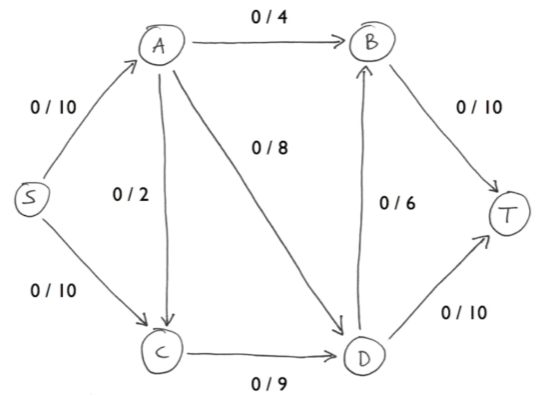

In [19]:
edges = [
    ('s', 'a', 10),
    ('s', 'c', 10),
    ('a', 'c', 2),
    ('a', 'd', 8),
    ('a', 'b', 4),
    ('c', 'd', 9),
    ('d', 'b', 6),
    ('d', 't', 10),
    ('b', 't', 10)
]
source = 's'
sink = 't'

example = FordFulkerson(edges)
max_flow, final_graph = example.ford_fulkerson(source, sink)
print(f"The maximum flow from source '{source}' to sink '{sink}' is {max_flow}")
print(f"The final graph is:")
for edge, values in final_graph.items():
    print(f'{edge}: {values}')

The maximum flow from source 's' to sink 't' is 19
The final graph is:
s: {'a': 0, 'c': 1}
a: {'s': 10, 'c': 2, 'd': 1, 'b': 1}
c: {'s': 9, 'a': 0, 'd': 0}
d: {'a': 7, 'c': 9, 'b': 0, 't': 0}
b: {'a': 3, 'd': 6, 't': 1}
t: {'d': 10, 'b': 9}


### Solved example (just in case I missed something)

- $\color{black}{\text{black}}$ - final forward edges
- $\color{red}{\text{red}}$ - final backward edges
- $\color{purple}{\text{purple}}$ - 'clogged' edges (BFS cannot pass through them)

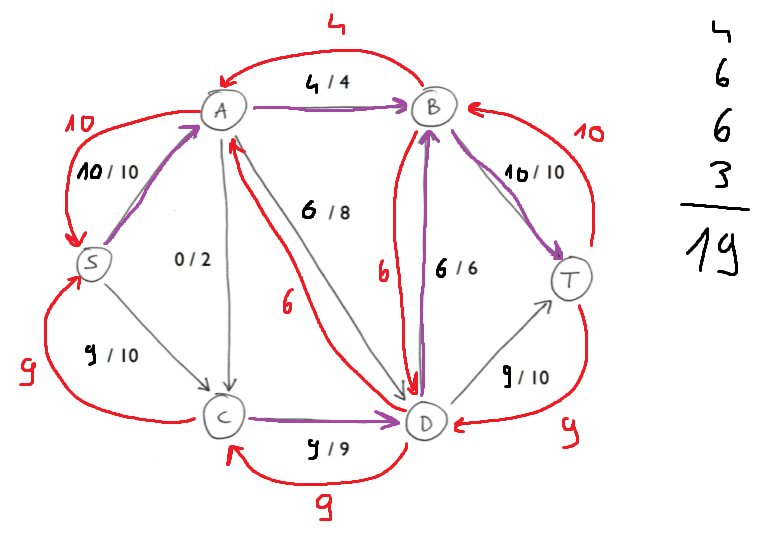